In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Magang.xlsx')

In [ ]:
print(df.shape)
df

(11, 9)


,BANK,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE
0,BCA,86,47,67,81,75,48,71,67
1,DANAMON,17,21,13,15,21,17,21,21
2,MAYBANK,12,16,14,13,22,16,20,21
3,MANDIRI,67,38,55,67,61,39,61,43
4,CIMB NIAGA,32,26,25,33,33,25,30,25
5,BNI,62,41,36,57,50,35,43,32
6,PERMATA,16,16,15,16,21,16,20,20
7,BRI,74,66,38,70,62,59,49,40
8,OCBC NISP,13,13,13,13,19,14,18,18
9,MEGA,19,15,17,17,22,17,21,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   BANK                                                                            11 non-null     object
 1   HAVE MANY BRANCHES                                                              11 non-null     int64 
 2   CHARGE LOW TRANSACTION FEE                                                      11 non-null     int64 
 3   PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT                             11 non-null     int64 
 4   STRATEGIC LOCATIONS ATM AND BRANCHES                                            11 non-null     int64 
 5   GIVING FAST SERVICE                                                             11 non-null     int64 
 6   HAVE ATTRACTIVE LOAN PACKAGE 

In [ ]:
df.isnull().sum()

BANK                                                                              0
HAVE MANY BRANCHES                                                                0
CHARGE LOW TRANSACTION FEE                                                        0
PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT                               0
STRATEGIC LOCATIONS ATM AND BRANCHES                                              0
GIVING FAST SERVICE                                                               0
HAVE ATTRACTIVE LOAN PACKAGE                                                      0
CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET    0
MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE                                   0
dtype: int64

In [ ]:
df.corr()

,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE
HAVE MANY BRANCHES,1.000000,0.920551,0.943657,0.997778,0.991420,0.951489,0.968211,0.918120
CHARGE LOW TRANSACTION FEE,0.920551,1.000000,0.768319,0.915967,0.901674,0.987810,0.822988,0.774195
PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,0.943657,0.768319,1.000000,0.953334,0.968400,0.838559,0.993448,0.967275
STRATEGIC LOCATIONS ATM AND BRANCHES,0.997778,0.915967,0.953334,1.000000,0.995502,0.951040,0.975335,0.921679
GIVING FAST SERVICE,0.991420,0.901674,0.968400,0.995502,1.000000,0.944187,0.985362,0.949342
HAVE ATTRACTIVE LOAN PACKAGE,0.951489,0.987810,0.838559,0.951040,0.944187,1.000000,0.882160,0.839742
CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,0.968211,0.822988,0.993448,0.975335,0.985362,0.882160,1.000000,0.963533
MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE,0.918120,0.774195,0.967275,0.921679,0.949342,0.839742,0.963533,1.000000


In [ ]:
df.describe()

,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,37.727273,28.454545,27.454545,36.000000,36.636364,27.272727,33.818182,29.000000
std,28.425661,17.328379,19.278816,27.085051,21.247460,15.672210,19.135403,15.690762
min,12.000000,13.000000,9.000000,13.000000,17.000000,14.000000,18.000000,14.000000
25%,16.500000,15.500000,13.500000,14.500000,21.000000,16.000000,20.000000,19.000000
50%,19.000000,21.000000,17.000000,17.000000,22.000000,17.000000,21.000000,21.000000
75%,64.500000,39.500000,37.000000,62.000000,55.500000,37.000000,46.000000,36.000000
max,86.000000,66.000000,67.000000,81.000000,75.000000,59.000000,71.000000,67.000000


In [ ]:
df['BANK']

0            BCA
1        DANAMON
2        MAYBANK
3        MANDIRI
4     CIMB NIAGA
5            BNI
6        PERMATA
7            BRI
8      OCBC NISP
9           MEGA
10           BTN
Name: BANK, dtype: object

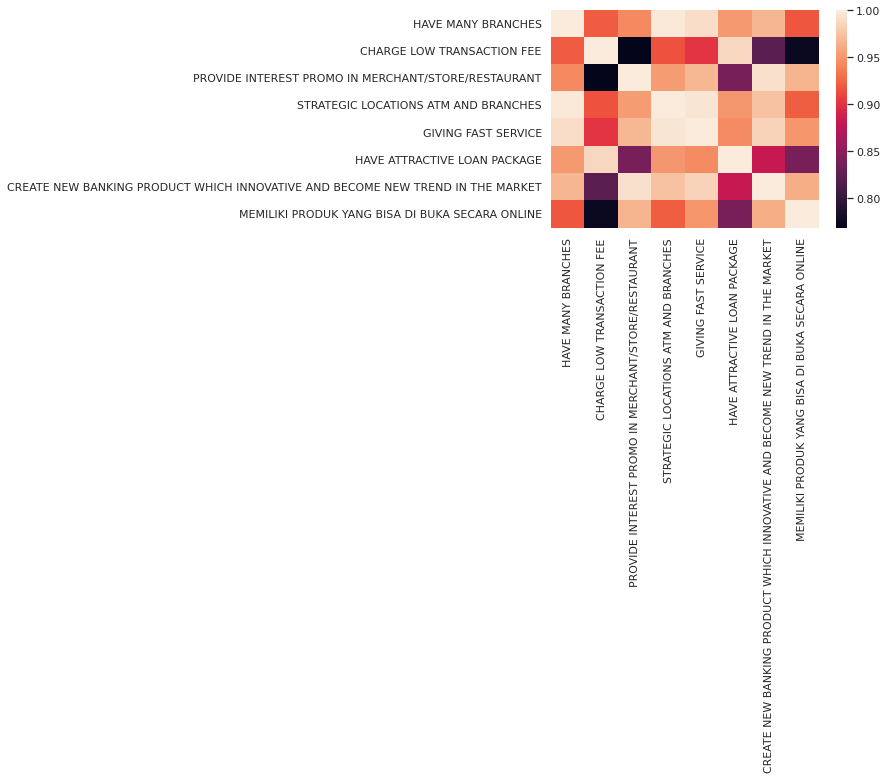

In [ ]:
corr_df = df.corr()

import seaborn as sns
sns.heatmap(corr_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


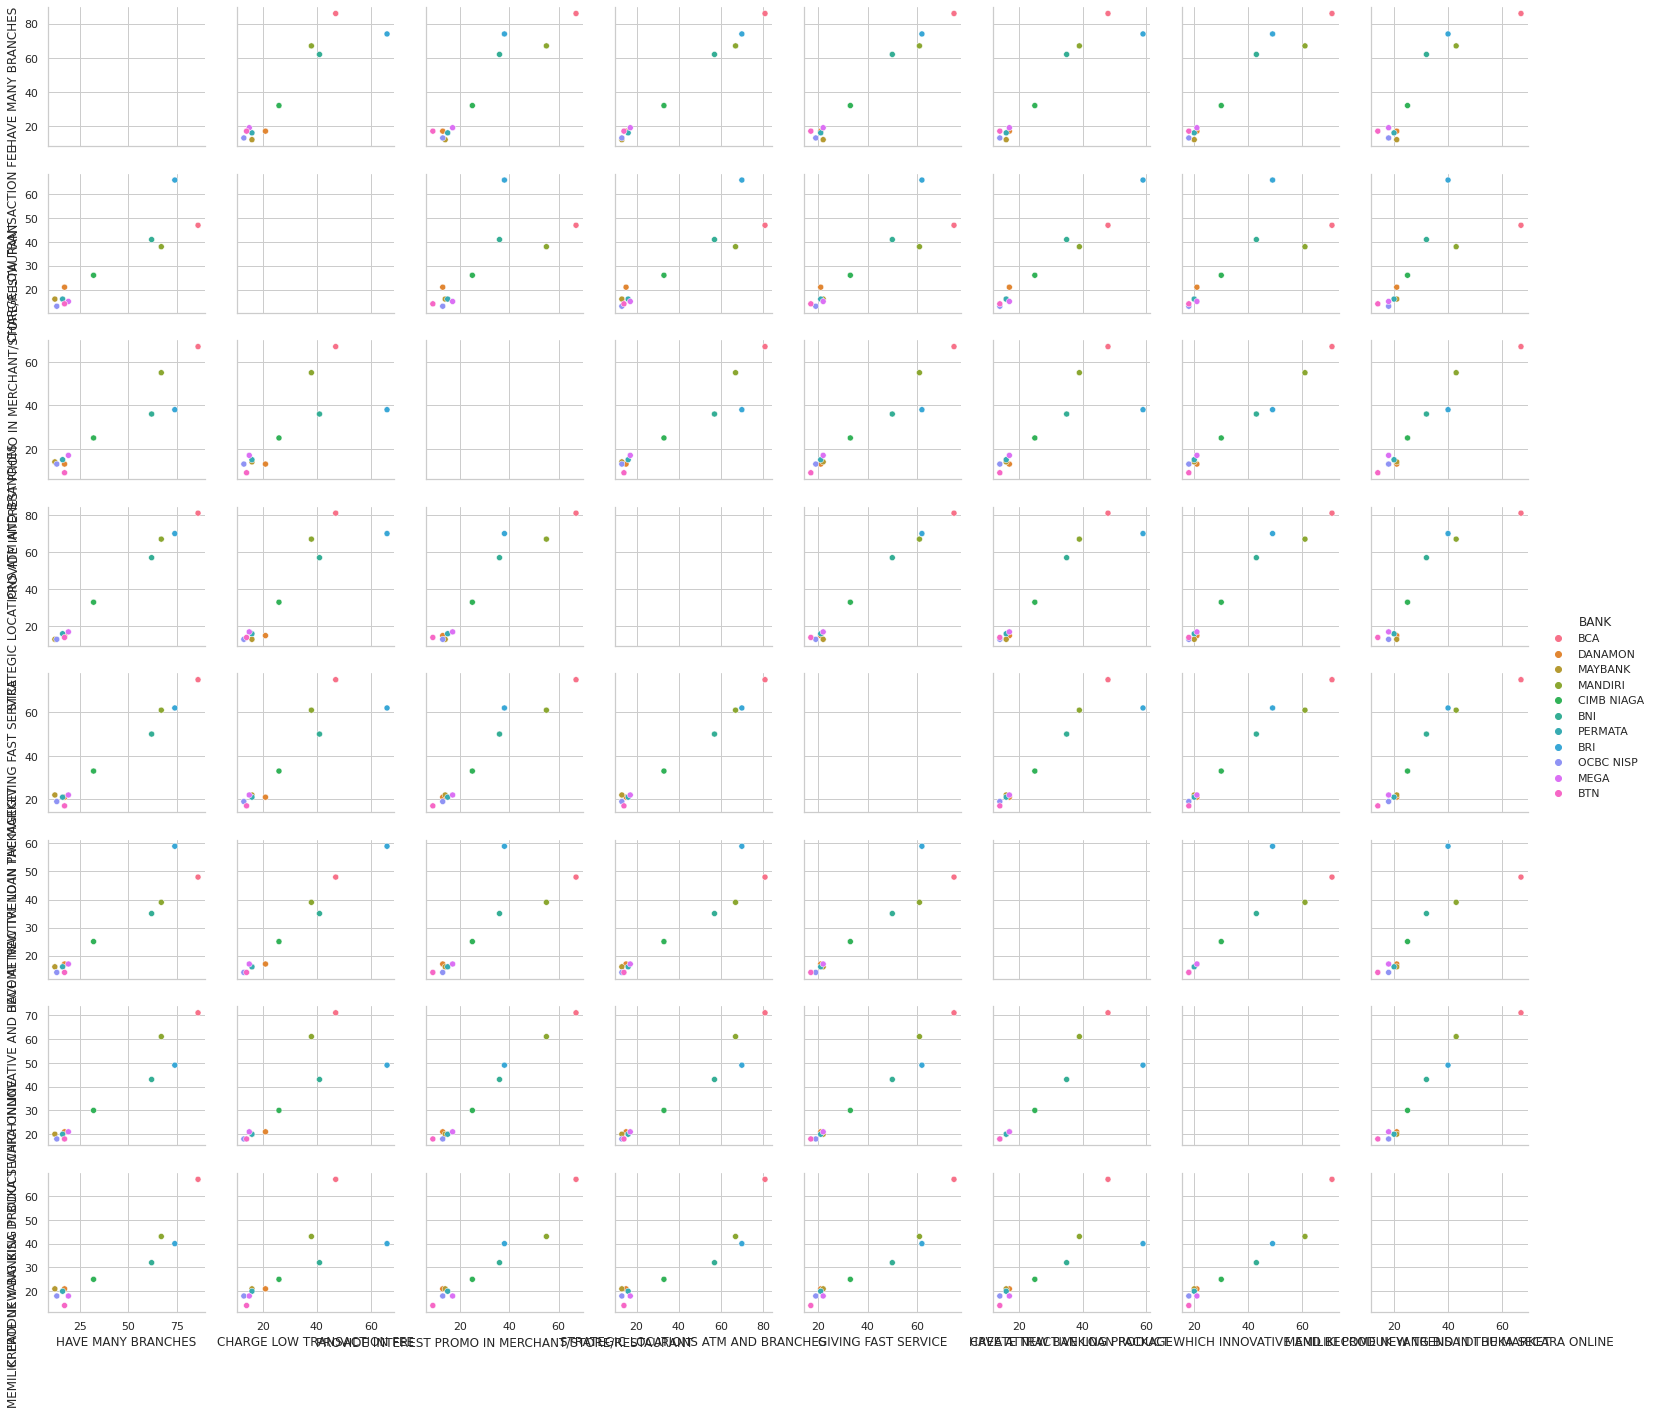

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="BANK",size=3);
plt.show()

In [ ]:
df_corr = df.corr()['HAVE MANY BRANCHES'][:-1] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with HAVE MANY BRANCHES:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with HAVE MANY BRANCHES:
HAVE MANY BRANCHES                                                                1.000000
STRATEGIC LOCATIONS ATM AND BRANCHES                                              0.997778
GIVING FAST SERVICE                                                               0.991420
CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET    0.968211
HAVE ATTRACTIVE LOAN PACKAGE                                                      0.951489
PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT                               0.943657
CHARGE LOW TRANSACTION FEE                                                        0.920551
Name: HAVE MANY BRANCHES, dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_x = df.iloc[:, 1:9]
df_x.head()

,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE
0,86,47,67,81,75,48,71,67
1,17,21,13,15,21,17,21,21
2,12,16,14,13,22,16,20,21
3,67,38,55,67,61,39,61,43
4,32,26,25,33,33,25,30,25


In [ ]:
#VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df_x.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df_x.values, i) for i in range(len(df_x.columns))]
  
print(vif_data)

                                             feature          VIF
0                                 HAVE MANY BRANCHES  1364.963720
1                         CHARGE LOW TRANSACTION FEE   730.316136
2  PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTA...  1299.166705
3               STRATEGIC LOCATIONS ATM AND BRANCHES  3216.742323
4                                GIVING FAST SERVICE  2379.393384
5                       HAVE ATTRACTIVE LOAN PACKAGE   568.334926
6  CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AN...   788.960808
7    MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE   222.880506


In [ ]:
df_array = np.array(df_x)
print(df_array)

[[86 47 67 81 75 48 71 67]
 [17 21 13 15 21 17 21 21]
 [12 16 14 13 22 16 20 21]
 [67 38 55 67 61 39 61 43]
 [32 26 25 33 33 25 30 25]
 [62 41 36 57 50 35 43 32]
 [16 16 15 16 21 16 20 20]
 [74 66 38 70 62 59 49 40]
 [13 13 13 13 19 14 18 18]
 [19 15 17 17 22 17 21 18]
 [17 14  9 14 17 14 18 14]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_array)
len(df_scaled)

11

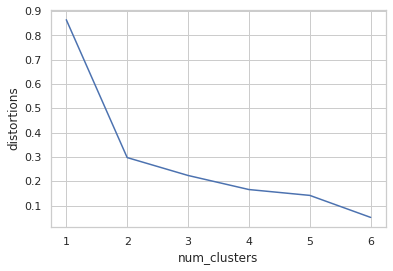

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df_scaled, i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
disortions.head()

NameError: ignored

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=123)

In [ ]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=123)

In [ ]:
print(kmeans.cluster_centers_)

[[0.08108108 0.08086253 0.10591133 0.06302521 0.08866995 0.06666667
  0.05929919 0.10512129]
 [0.81418919 0.66037736 0.68965517 0.81985294 0.77586207 0.69444444
  0.71698113 0.59433962]]


In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()

[1 0 0 1 0 1 0 1 0 0 0]


,BANK,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE,kluster
0,BCA,86,47,67,81,75,48,71,67,1
1,DANAMON,17,21,13,15,21,17,21,21,0
2,MAYBANK,12,16,14,13,22,16,20,21,0
3,MANDIRI,67,38,55,67,61,39,61,43,1
4,CIMB NIAGA,32,26,25,33,33,25,30,25,0


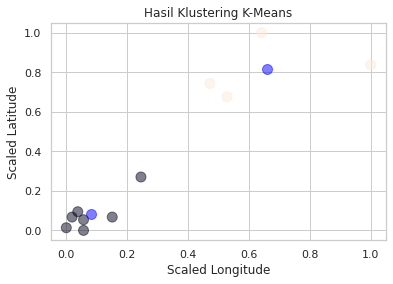

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,1], df_scaled[:,0], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 100, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

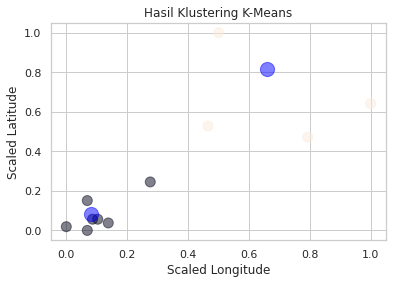

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,2], df_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

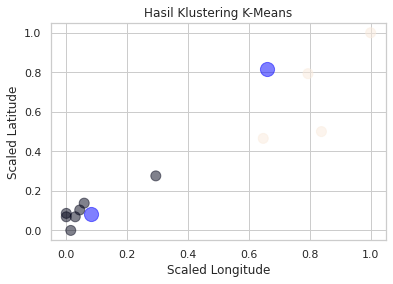

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,3], df_scaled[:,2], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

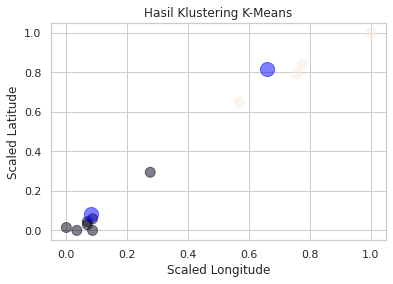

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,4], df_scaled[:,3], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

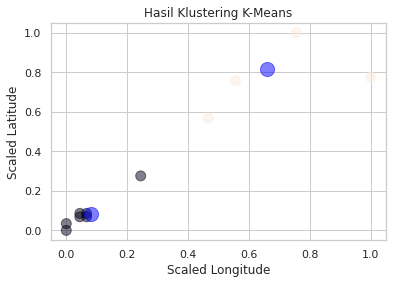

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,5], df_scaled[:,4], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

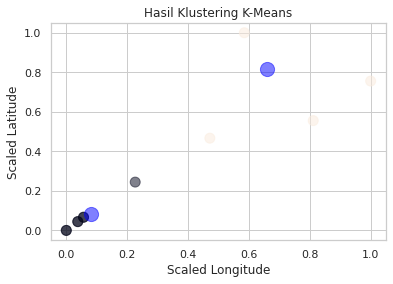

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,6], df_scaled[:,5], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

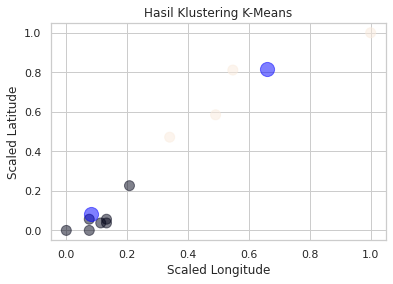

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,7], df_scaled[:,6], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

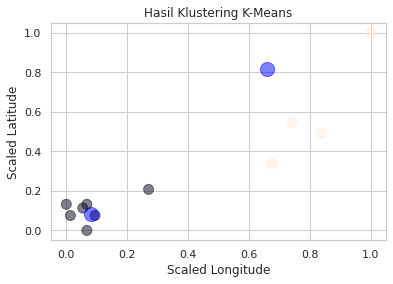

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(df_scaled[:,0], df_scaled[:,7], s = 100, c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

In [ ]:
  df

,BANK,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE,kluster
0,BCA,86,47,67,81,75,48,71,67,1
1,DANAMON,17,21,13,15,21,17,21,21,0
2,MAYBANK,12,16,14,13,22,16,20,21,0
3,MANDIRI,67,38,55,67,61,39,61,43,1
4,CIMB NIAGA,32,26,25,33,33,25,30,25,0
5,BNI,62,41,36,57,50,35,43,32,1
6,PERMATA,16,16,15,16,21,16,20,20,0
7,BRI,74,66,38,70,62,59,49,40,1
8,OCBC NISP,13,13,13,13,19,14,18,18,0
9,MEGA,19,15,17,17,22,17,21,18,0


In [ ]:
grouped_kluster = df.groupby('kluster')[['HAVE MANY BRANCHES',	'CHARGE LOW TRANSACTION FEE',	'PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT',	'STRATEGIC LOCATIONS ATM AND BRANCHES',	'GIVING FAST SERVICE',	'HAVE ATTRACTIVE LOAN PACKAGE',	'CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET',	'MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE']].mean()

In [ ]:
grouped_kluster

,HAVE MANY BRANCHES,CHARGE LOW TRANSACTION FEE,PROVIDE INTEREST PROMO IN MERCHANT/STORE/RESTAURANT,STRATEGIC LOCATIONS ATM AND BRANCHES,GIVING FAST SERVICE,HAVE ATTRACTIVE LOAN PACKAGE,CREATE NEW BANKING PRODUCT WHICH INNOVATIVE AND BECOME NEW TREND IN THE MARKET,MEMILIKI PRODUK YANG BISA DI BUKA SECARA ONLINE
kluster,,,,,,,,
0,18.00,17.285714,15.142857,17.285714,22.142857,17.00,21.142857,19.571429
1,72.25,48.000000,49.000000,68.750000,62.000000,45.25,56.000000,45.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


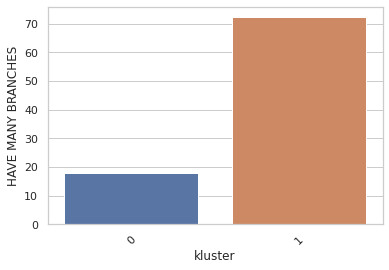

In [ ]:
sns.barplot(grouped_kluster.index, grouped_kluster['HAVE MANY BRANCHES'])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


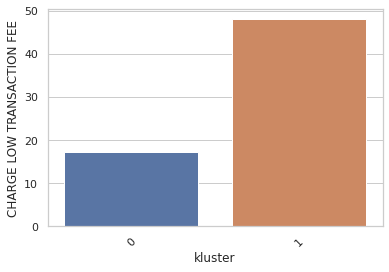

In [ ]:
sns.barplot(grouped_kluster.index, grouped_kluster['CHARGE LOW TRANSACTION FEE'])
plt.xticks(rotation=45)
plt.show()

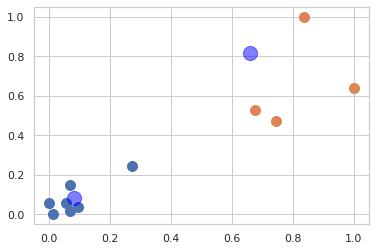

In [ ]:
y_kmeans = kmeans.fit_predict(df_scaled)
plt.scatter(df_scaled[y_kmeans   == 0, 0], df_scaled[y_kmeans == 0, 1],s = 100, cmap = df.kluster)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='blue', s = 200, alpha=0.5)
plt.scatter(df_scaled[y_kmeans   == 1, 0], df_scaled[y_kmeans == 1, 1],s = 100, cmap = df.kluster)
plt.show()

In [ ]:
df.kluster=df.kluster.astype('int')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
